# Pandas. Работа с несколькими датафреймами.

In [2]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None, "display.max_rows", None)

from IPython.display import Image

### Const

In [3]:
application_train_data_path =  'data/home-credit-default-risk/application_train_small.csv'
bureau_data_path = 'data/home-credit-default-risk/bureau_small.csv'

### Application data

In [4]:
df = pd.read_csv(application_train_data_path)
df = df.rename(columns = lambda x: x.lower())

In [5]:
need_cols = [
    'sk_id_curr',
    'target',
    'name_contract_type',
    'code_gender',
    'flag_own_car',
    'flag_own_realty',
    'cnt_children',
    'amt_income_total',
    'amt_credit',
    'amt_annuity',
    'amt_goods_price',
    'name_type_suite',
    'name_income_type',
    'name_education_type',
    'name_family_status',
    'name_housing_type',
    'region_population_relative',
    'days_birth',
    'days_employed',
    'days_registration',
    'days_id_publish',
    'own_car_age',
    'flag_mobil',
    'flag_emp_phone',
    'flag_work_phone',
    'flag_cont_mobile',
    'flag_phone',
    'flag_email',
    'occupation_type',
    'cnt_fam_members',
    'amt_req_credit_bureau_hour',
    'amt_req_credit_bureau_day',
    'amt_req_credit_bureau_week',
    'amt_req_credit_bureau_mon',
    'amt_req_credit_bureau_qrt',
    'amt_req_credit_bureau_year'
]

In [6]:
#отберем часть столбцов для дальнейшей работы
df = df[need_cols]

In [7]:
#небольшой препроцессинг с прошлого занятия
cols_to_preprocess = ['days_birth', 'days_employed','days_registration']

for x in cols_to_preprocess:
    df[f'{x}_years'] = np.abs(df[x])/365.25
    
df['age_bins'] = pd.cut(
    df['days_birth_years'], 
    bins = [-np.inf, 23, 25, 30, 35, 40, 45, 50, np.inf],
    labels = ['0.0-23', '1.23-25', '2.25-30', '3.30-35', '4.35-40', '5.40-45', '6.45-50', '7.50+']
)

In [8]:
df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,days_birth_years,days_employed_years,days_registration_years,age_bins
0,163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+
1,256730,0,Cash loans,M,N,N,0,58500.0,269550.0,10116.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.020246,-23152,365243,-15551.0,-4795,NaN,1,0,0,1,0,0,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,63.386721,999.980835,42.576318,7.50+
2,208600,0,Revolving loans,M,N,Y,0,126000.0,180000.0,9000.0,180000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.019689,-9172,-2229,-1060.0,-1850,NaN,1,1,1,1,1,0,Managers,1.0,0.0,0.0,0.0,0.0,0.0,2.0,25.111567,6.102669,2.902122,2.25-30
3,444689,0,Cash loans,M,Y,Y,0,126000.0,139230.0,10903.5,112500.0,Other_B,Pensioner,Secondary / secondary special,Married,House / apartment,0.007020,-23445,365243,-4303.0,-4765,3.0,1,0,0,1,0,0,NaN,2.0,0.0,0.0,0.0,1.0,0.0,6.0,64.188912,999.980835,11.780972,7.50+
4,140507,0,Cash loans,F,N,N,0,225000.0,1800000.0,49500.0,1800000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-19622,-11059,-3538.0,-3083,NaN,1,1,0,1,0,0,Core staff,2.0,0.0,0.0,0.0,0.0,2.0,8.0,53.722108,30.277892,9.686516,7.50+


### Bureau data

In [9]:
db = pd.read_csv(bureau_data_path)
db.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,426155,5714498,Closed,currency 1,-1331,0,-994.0,-1023.0,1350.0,0,39433.5,0.0,0.0,0.0,Consumer credit,-1023,NaN
1,426155,5714499,Closed,currency 1,-2534,0,-2352.0,-2347.0,NaN,0,38830.5,0.0,0.0,0.0,Consumer credit,-2345,NaN
2,426155,5714500,Closed,currency 1,-845,0,-480.0,-480.0,0.0,0,67500.0,0.0,0.0,0.0,Consumer credit,-480,NaN


In [10]:
db.shape

(147256, 17)

In [11]:
db = db.rename(columns = lambda x: x.lower())
db.head(2)

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,426155,5714498,Closed,currency 1,-1331,0,-994.0,-1023.0,1350.0,0,39433.5,0.0,0.0,0.0,Consumer credit,-1023,NaN
1,426155,5714499,Closed,currency 1,-2534,0,-2352.0,-2347.0,NaN,0,38830.5,0.0,0.0,0.0,Consumer credit,-2345,NaN


In [12]:
df.shape

(30751, 40)

In [13]:
#посмотрим, сколько различных заявок (sk_id_curr) и сколько различных идентификаторов записи бюро sk_id_bureau
db.sk_id_curr.nunique(), df.sk_id_curr.nunique()

(26344, 30751)

In [14]:
db.sk_id_bureau.nunique()

147256

In [15]:
#посмотрим основные статистики по датасету
db.describe()

,sk_id_curr,sk_id_bureau,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity
count,147256.000000,1.472560e+05,147256.000000,147256.000000,138380.000000,92782.000000,5.161700e+04,147256.000000,1.472560e+05,1.248210e+05,9.786800e+04,1.472560e+05,147256.000000,3.341800e+04
mean,279260.739569,5.891754e+06,-1142.309305,0.871998,478.211938,-1021.860867,3.250696e+03,0.007001,3.481388e+05,1.367120e+05,6.387555e+03,6.265304e+01,-602.829895,1.309053e+04
std,103147.581606,5.396515e+05,798.009197,37.730225,4953.708842,715.115883,5.988816e+04,0.100583,8.916177e+05,6.431245e+05,4.858185e+04,1.036017e+04,814.276324,5.815073e+04
min,100003.000000,5.000088e+06,-2922.000000,0.000000,-42042.000000,-2903.000000,0.000000e+00,0.000000,0.000000e+00,-2.796724e+06,-4.013469e+05,0.000000e+00,-41943.000000,0.000000e+00
25%,189202.500000,5.412590e+06,-1667.000000,0.000000,-1142.000000,-1498.000000,0.000000e+00,0.000000,5.080500e+04,0.000000e+00,0.000000e+00,0.000000e+00,-903.000000,0.000000e+00
50%,279673.000000,5.860460e+06,-986.000000,0.000000,-337.000000,-900.000000,0.000000e+00,0.000000,1.231200e+05,0.000000e+00,0.000000e+00,0.000000e+00,-408.000000,0.000000e+00
75%,369288.000000,6.369210e+06,-471.000000,0.000000,458.000000,-430.000000,0.000000e+00,0.000000,3.060000e+05,3.947850e+04,0.000000e+00,0.000000e+00,-33.000000,1.350450e+04
max,456239.000000,6.843330e+06,-1.000000,2754.000000,31198.000000,0.000000,1.086181e+07,5.000000,5.400000e+07,5.136516e+07,4.500000e+06,3.756681e+06,19.000000,4.174677e+06


In [16]:
db.dtypes

sk_id_curr                  int64
sk_id_bureau                int64
credit_active              object
credit_currency            object
days_credit                 int64
credit_day_overdue          int64
days_credit_enddate       float64
days_enddate_fact         float64
amt_credit_max_overdue    float64
cnt_credit_prolong          int64
amt_credit_sum            float64
amt_credit_sum_debt       float64
amt_credit_sum_limit      float64
amt_credit_sum_overdue    float64
credit_type                object
days_credit_update          int64
amt_annuity               float64
dtype: object

In [19]:
cat_cols = [x for x in db.columns if db[x].dtype=='object']
cat_cols

['credit_active', 'credit_currency', 'credit_type']

In [20]:
for x in cat_cols:
    print(db[x].value_counts(dropna=False))

Closed      92515
Active      54197
Sold          543
Bad debt        1
Name: credit_active, dtype: int64
currency 1    147141
currency 2        98
currency 3        15
currency 4         2
Name: credit_currency, dtype: int64
Consumer credit                           107826
Credit card                                34278
Car loan                                    2344
Mortgage                                    1533
Microloan                                    948
Loan for business development                155
Another type of loan                          85
Unknown type of loan                          50
Loan for working capital replenishment        33
Real estate loan                               3
Cash loan (non-earmarked)                      1
Name: credit_type, dtype: int64


### Как объединить два датафрейма?

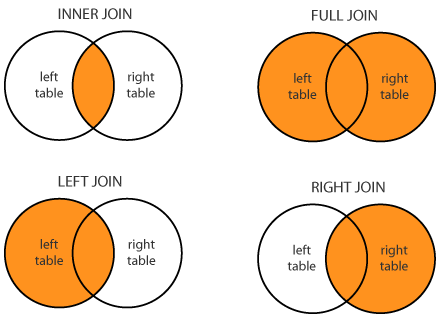

In [20]:
Image(filename='images/joins.png')

#### Merge

Удобно использовать для джойна датафреймов по столбцам. По дефолту 'inner join'.

In [22]:
#появились столбцы с суффиксами. Почему? Потому что есть дублирующие колонки в таблицах. Сделаем понятные суффиксы
d_inner = df.merge(db, on = 'sk_id_curr', suffixes = ['_app', '_bureau'])
d_inner.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity_app,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,days_birth_years,days_employed_years,days_registration_years,age_bins,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity_bureau
0,163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+,5540129,Active,currency 1,-63,0,302.0,NaN,NaN,0,90000.0,90000.0,0.0,0.0,Consumer credit,-60,NaN
1,163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+,5540130,Closed,currency 1,-571,0,-389.0,-389.0,NaN,0,110358.0,0.0,NaN,0.0,Consumer credit,-376,NaN


In [23]:
d_inner.shape

(147256, 56)

In [24]:
d_inner.sk_id_curr.nunique()

26344

In [25]:
df.shape

(30751, 40)

In [26]:
#left
d_left = df.merge(db, on = 'sk_id_curr', how='left', suffixes = ['_app', '_bureau'])
d_inner.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity_app,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,days_birth_years,days_employed_years,days_registration_years,age_bins,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity_bureau
0,163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+,5540129,Active,currency 1,-63,0,302.0,NaN,NaN,0,90000.0,90000.0,0.0,0.0,Consumer credit,-60,NaN
1,163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+,5540130,Closed,currency 1,-571,0,-389.0,-389.0,NaN,0,110358.0,0.0,NaN,0.0,Consumer credit,-376,NaN


In [27]:
d_left.shape

(151663, 56)

In [28]:
d_left.sk_id_curr.nunique()

30751

In [5]:
#почему в d_left больше записей, чем в d_inner и db?

#### Join

Удобно использовать для джойна датафреймов с одинаковым индексом. По дефолту 'left join'. 

In [29]:
df.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,days_birth_years,days_employed_years,days_registration_years,age_bins
0,163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+
1,256730,0,Cash loans,M,N,N,0,58500.0,269550.0,10116.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.020246,-23152,365243,-15551.0,-4795,NaN,1,0,0,1,0,0,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,63.386721,999.980835,42.576318,7.50+


In [30]:
df = df.set_index('sk_id_curr')
df.head(2)

,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,days_birth_years,days_employed_years,days_registration_years,age_bins
sk_id_curr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+
256730,0,Cash loans,M,N,N,0,58500.0,269550.0,10116.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.020246,-23152,365243,-15551.0,-4795,NaN,1,0,0,1,0,0,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,63.386721,999.980835,42.576318,7.50+


In [31]:
db = db.set_index('sk_id_curr')
db.head(2)

,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
sk_id_curr,,,,,,,,,,,,,,,,
426155,5714498,Closed,currency 1,-1331,0,-994.0,-1023.0,1350.0,0,39433.5,0.0,0.0,0.0,Consumer credit,-1023,NaN
426155,5714499,Closed,currency 1,-2534,0,-2352.0,-2347.0,NaN,0,38830.5,0.0,0.0,0.0,Consumer credit,-2345,NaN


In [36]:
d_join = df.join(db, lsuffix = '_app', rsuffix = '_bureau')
d_join.head(2)

,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity_app,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,days_birth_years,days_employed_years,days_registration_years,age_bins,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity_bureau
sk_id_curr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,0.0,0.0,0.0,0.0,0.0,0.0,45.900068,3.252567,3.247091,6.45-50,5885877.0,Closed,currency 1,-2586.0,0.0,-2434.0,-2131.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit,-2131.0,NaN
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,0.0,0.0,0.0,0.0,0.0,0.0,45.900068,3.252567,3.247091,6.45-50,5885878.0,Closed,currency 1,-1636.0,0.0,-540.0,-540.0,0.0,0.0,112500.0,0.0,0.0,0.0,Credit card,-540.0,NaN


In [37]:
d_join.shape

(151663, 55)

### Pandasql

Установка пакета

In [8]:
import sys

In [9]:
!pip install pandasql

  Using cached pandasql-0.7.3.tar.gz (26 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26768 sha256=11e6fc6dbff8c0942da371d2a9fb50484ca1a801d777ea444c235488d932036f
  Stored in directory: /Users/annarusinova/Library/Caches/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [10]:
#возможно потребуется переустановка библиотеки sqlalchemy на более старую версию для корректной работы
!pip install sqlalchemy==1.4.46

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 7.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.4.46-cp39-cp39-macosx_10_9_x86_64.whl size=1559992 sha256=250d02e4d9195fdc627ef37add6a0dcf9e41ea749cc1dcfa06fefc6e46006a4b
  Stored in directory: /Users/annarusinova/Library/Caches/pip/wheels/3c/99/65/57cf5a0ec6e7f3b803a68d31694501e168997e03e80adc903d
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39


Работа с pandasql

https://www.sql-ex.ru/?Lang=0

#### Отобрать столбцы

In [40]:
from pandasql import sqldf

In [47]:
#отобрать столбцы
query = """
select target, name_contract_type
from df
"""

In [48]:
dtest = sqldf(query)
dtest.head(2)

,target,name_contract_type
0,0,Cash loans
1,0,Cash loans


In [49]:
type(dtest)

pandas.core.frame.DataFrame

In [50]:
dtest.shape

(30751, 2)

#### Условия 

In [44]:
query = """
select target, name_contract_type
from df
where amt_credit > 200000
    and days_birth_years > 30
"""

In [45]:
dtest = sqldf(query)
dtest.head()

,target,name_contract_type
0,0,Cash loans
1,0,Cash loans
2,0,Cash loans
3,0,Cash loans
4,0,Cash loans


In [46]:
dtest.shape

(23484, 2)

#### Group by и агрегаты

In [26]:
#group by

In [53]:
query = """
select name_contract_type, avg(days_birth_years) age_mean, max(amt_income_total) income_max
from df
group by name_contract_type
"""

In [54]:
dtest = sqldf(query)
dtest

,name_contract_type,age_mean,income_max
0,Cash loans,44.186638,18000090.0
1,Revolving loans,40.676315,2250000.0


#### Join

In [55]:
query = """
select df.target,
    df.amt_..
    df.amt_annuity as amt_annuity_app
    ...
    db.amt_annuity as amt_annuity_bureau
from df
left join db
on df.sk_id_curr = db.sk_id_curr
"""

In [56]:
dtest = sqldf(query)
dtest.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,days_birth_years,days_employed_years,days_registration_years,age_bins,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+,163465.0,5540129.0,Active,currency 1,-63.0,0.0,302.0,NaN,NaN,0.0,90000.0,90000.0,0.0,0.0,Consumer credit,-60.0,NaN
1,163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+,163465.0,5540130.0,Closed,currency 1,-571.0,0.0,-389.0,-389.0,NaN,0.0,110358.0,0.0,NaN,0.0,Consumer credit,-376.0,NaN


In [57]:
dtest.shape

(151663, 57)

#### Время работы

In [58]:
df.head(2)

,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,days_birth_years,days_employed_years,days_registration_years,age_bins
sk_id_curr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+
256730,0,Cash loans,M,N,N,0,58500.0,269550.0,10116.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.020246,-23152,365243,-15551.0,-4795,NaN,1,0,0,1,0,0,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,63.386721,999.980835,42.576318,7.50+


In [59]:
db.head(2)

,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
sk_id_curr,,,,,,,,,,,,,,,,
426155,5714498,Closed,currency 1,-1331,0,-994.0,-1023.0,1350.0,0,39433.5,0.0,0.0,0.0,Consumer credit,-1023,NaN
426155,5714499,Closed,currency 1,-2534,0,-2352.0,-2347.0,NaN,0,38830.5,0.0,0.0,0.0,Consumer credit,-2345,NaN


In [60]:
%%time
query = """
select *
from df
left join db
on df.sk_id_curr = db.sk_id_curr
"""

dtest = sqldf(query)

CPU times: user 7.67 s, sys: 357 ms, total: 8.03 s
Wall time: 8.07 s


In [61]:
%%time
d_join = df.join(db, lsuffix = '_app', rsuffix = '_bureau')

CPU times: user 73.5 ms, sys: 20.6 ms, total: 94.1 ms
Wall time: 92.3 ms


### Concat

https://pandas.pydata.org/pandas-docs/version/0.17/merging.html

In [63]:
# axis = 0 (вертикально)
df_cash = df[df.name_contract_type == 'Cash loans']
df_card = df[df.name_contract_type == 'Revolving loans']
df_cash.shape, df_card.shape

((27815, 39), (2936, 39))

In [64]:
df_concat = pd.concat([df_cash, df_card])
df_concat.shape

(30751, 39)

In [65]:
# axis = 1 (горизонтально)
# удобно конкатенировать при наличии одинаковых индексов
df.head(2)

,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,days_birth_years,days_employed_years,days_registration_years,age_bins
sk_id_curr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
163465,0,Cash loans,F,N,Y,0,54000.0,50940.0,5166.0,45000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.031329,-18735,-5347,-6359.0,-2115,NaN,1,1,0,1,0,0,Cooking staff,2.0,0.0,0.0,0.0,0.0,0.0,2.0,51.293634,14.639288,17.409993,7.50+
256730,0,Cash loans,M,N,N,0,58500.0,269550.0,10116.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.020246,-23152,365243,-15551.0,-4795,NaN,1,0,0,1,0,0,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,63.386721,999.980835,42.576318,7.50+


In [66]:
db.head(2)

,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
sk_id_curr,,,,,,,,,,,,,,,,
426155,5714498,Closed,currency 1,-1331,0,-994.0,-1023.0,1350.0,0,39433.5,0.0,0.0,0.0,Consumer credit,-1023,NaN
426155,5714499,Closed,currency 1,-2534,0,-2352.0,-2347.0,NaN,0,38830.5,0.0,0.0,0.0,Consumer credit,-2345,NaN


In [67]:
d_concat = pd.concat([df, db], axis = 1)
d_concat.shape

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

### Задачa

На основе данных bureau сформируйте осмысленные агрегаты в разрезе sk_id_curr и добавьте эти данные к заявочным данным (application data).

#### Способ 1

In [68]:
db = db.reset_index()
db.head(2)

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,426155,5714498,Closed,currency 1,-1331,0,-994.0,-1023.0,1350.0,0,39433.5,0.0,0.0,0.0,Consumer credit,-1023,NaN
1,426155,5714499,Closed,currency 1,-2534,0,-2352.0,-2347.0,NaN,0,38830.5,0.0,0.0,0.0,Consumer credit,-2345,NaN


In [69]:
db_days = db.groupby('sk_id_curr').days_credit.max()
db_count = db.groupby('sk_id_curr').days_credit.count()

In [70]:
db_days.head(2)

sk_id_curr
100003    -606
100007   -1149
Name: days_credit, dtype: int64

In [71]:
db_count.head(2)

sk_id_curr
100003    4
100007    1
Name: days_credit, dtype: int64

In [72]:
d_concat = pd.concat([db_days, db_count], axis=1)
d_concat.head(2)

,days_credit,days_credit
sk_id_curr,,
100003,-606,4
100007,-1149,1


#### Способ 2 
Реализовать с помощью pandasql